#Model Klasifikasi Polusi Udara DKI Jakarka

# Import & install library 
Import & Menginstall library yang dibutuhkan dalam pengembangan proyek  data sains

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=c0b1a34aae4aa3136ef8afc730f92ed0a04e3ab1d6efadcb0743a55d8241e8da
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.io import loadmat

# Download Dataset





* Dataset yang akan diolah diunduh dari [data.jakarta.go.id](https://data.jakarta.go.id)
* Dataset yang diunduh merupakan dataset yang masing-masing file menyimpan data harian dari polusi udara di Provinsi Jakarta Selama sebulan
* Terdapat 12 file dataset yang diunduh dan akan dijadikan satu dataframe

Kolom yang terdapat pada datasets
1. tanggal : Tanggal pengukuran kualitas udara
2. pm10 : Partikulat salah satu parameter yang diukur
3. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
4. co : Carbon Monoksida salah satu parameter yand diukur
5. o3 : Ozon salah satu parameter yang diukur
6. no2 : NItrogen dioksida salah satu parameter yang diukur
7. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
8. critical : Parameter yang hasil pengukurannya paling tinggi
9. categori : Kategori hasil perhitungan indeks standar pencemaran udara

## Datasets 2021

### Download Link

In [ ]:
link_datasets_2021 = [
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/1494b7f4bca51e2361e28a2aa38acbb2/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Januari-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/57b5340a16e07a992b7c965dcfa9190a/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Februari-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/515199946526f55b7757d24381a6ec7f/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Maret-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/f0b491d322a4fbf976bedf20276fb8b1/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-April-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/e2533e4ceebc9b271142d7b7e3f12780/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Mei-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/6038c6062c8025c8364e6518de7348a2/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Juni-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/78cc249fa5ed50a27a49746fcbfc7a3d/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Juli-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/86799741890d53e7494a60aee89f8c45/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Agustus-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/9a0285888a9de2a76d26217b7cfb0018/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-September-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/afdc4318e12c8df62e77ad8377bb21a3/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-November-Tahun-2021.csv',
                 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/4799141d98e5fc48bb991f407cf82ae1/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Desember-Tahun-2021.csv',

]

files_2021 = []


for link in link_datasets_2021:
  file = wget.download(link)
  files_2021.append(file)

### Menggabungkan 12 Dataframe dari 12 File menjadi 1 dataframe

In [ ]:
dataframe_2021 = pd.read_csv(files_2021[0])

files_2021.remove(files_2021[0])

In [ ]:
for file in files_2021:
  df = pd.read_csv(file)
  dataframe_2021 = dataframe_2021.append(df,ignore_index=True)

In [ ]:
file = wget.download('https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/bf31cca411fd1eec04311944d919f638/download/Indeks-Standar-Pencemar-Udara-di-Provinsi-DKI-Jakarta-Bulan-Oktober-Tahun-2021.csv')
df_oktober = pd.read_csv(file)

df_oktober.rename(columns = {'no3':'no2'}, inplace = True)

In [ ]:
dataframe_2021 = dataframe_2021.append(df_oktober,ignore_index=True)

In [ ]:
dataframe = dataframe_2021

In [ ]:
dataframe

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,location,pm25
0,2021-01-01,43,58,29,35,65,65,O3,SEDANG,DKI2,NaN
1,2021-01-02,58,86,38,64,80,86,PM25,SEDANG,DKI3,NaN
2,2021-01-03,64,93,25,62,86,93,PM25,SEDANG,DKI3,NaN
3,2021-01-04,50,67,24,31,77,77,O3,SEDANG,DKI2,NaN
4,2021-01-05,59,89,24,35,77,89,PM25,SEDANG,DKI3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-10-27,62,64,15,50,39,90,PM25,SEDANG,DKI4,90.0
361,2021-10-28,54,67,16,56,39,78,PM25,SEDANG,DKI4,78.0
362,2021-10-29,54,80,19,49,35,80,SO2,SEDANG,DKI2,79.0
363,2021-10-30,64,81,15,58,40,103,PM25,TIDAK SEHAT,DKI4,103.0


# Data Understanding

## Melihat informasi dari dataframe

Melakukan pengecekan infromasi pada dataframe menggunakan fungsi **info()**. Terlihat bahwa terdapat dua kolom yang bertipe int. Dari datasets yang telah di-*load* terdapat sembilan buah kolom. Dimana pada kolom output merupakan label dari datasets

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   so2       365 non-null    int64  
 3   co        365 non-null    int64  
 4   o3        365 non-null    int64  
 5   no2       365 non-null    int64  
 6   max       365 non-null    int64  
 7   critical  365 non-null    object 
 8   categori  365 non-null    object 
 9   location  365 non-null    object 
 10  pm25      334 non-null    float64
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB


## Data Non-Numerik

### Melihat nilai pada fitur non-numerik

In [ ]:
dataframe['categori'].unique()

array(['SEDANG', 'TIDAK SEHAT', 'BAIK'], dtype=object)

In [ ]:
dataframe['location'].unique()

array(['DKI2', 'DKI3', 'DKI5', 'DKI4', 'DKI1'], dtype=object)

In [ ]:
dataframe['critical'].unique()

array(['O3', 'PM25', 'PM10', 'PM26', 'SO2'], dtype=object)

### Pie Chart Sebaran Data Pada Variable Depende(categori)

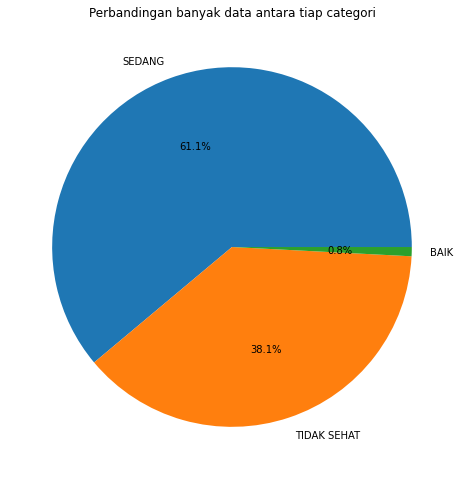

In [ ]:
data_for_pie = dataframe['categori'].value_counts()

plt.title('Perbandingan banyak data antara tiap categori')
plt.pie(
    data_for_pie,
    labels = dataframe['categori'].unique(),
    autopct='%1.1f%%',
)
plt.show()

## Data Numerik

### Deskripsi Data
Melihat deskripsi statistik pada data dengan fungsi **describe()**.

In [ ]:
dataframe.describe()

,pm10,so2,co,o3,no2,max,pm25
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,334.000000
mean,60.506849,52.753425,15.391781,49.805479,34.115068,94.030137,94.694611
std,15.155896,11.193823,5.857975,12.234790,15.974152,24.408647,24.153839
min,19.000000,37.000000,7.000000,20.000000,9.000000,45.000000,33.000000
25%,53.000000,45.000000,11.000000,41.000000,24.000000,77.000000,78.250000
50%,62.000000,52.000000,14.000000,49.000000,31.000000,93.000000,94.500000
75%,68.000000,55.000000,18.000000,57.000000,39.000000,108.000000,108.750000
max,179.000000,126.000000,47.000000,151.000000,134.000000,179.000000,174.000000


## Kendall Rank : Korelasi antara fitur numerik dengan label non-numerik

In [ ]:
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

In [ ]:
data = new_df.copy()

In [ ]:
data['categori'].unique()

array(['SEDANG', 'TIDAK SEHAT', 'BAIK'], dtype=object)

In [ ]:
data['categori'] = data['categori'].map({'BAIK': 2, 'SEDANG': 1,'TIDAK SEHAT':0})

In [ ]:
corr = data.corr(method='kendall')

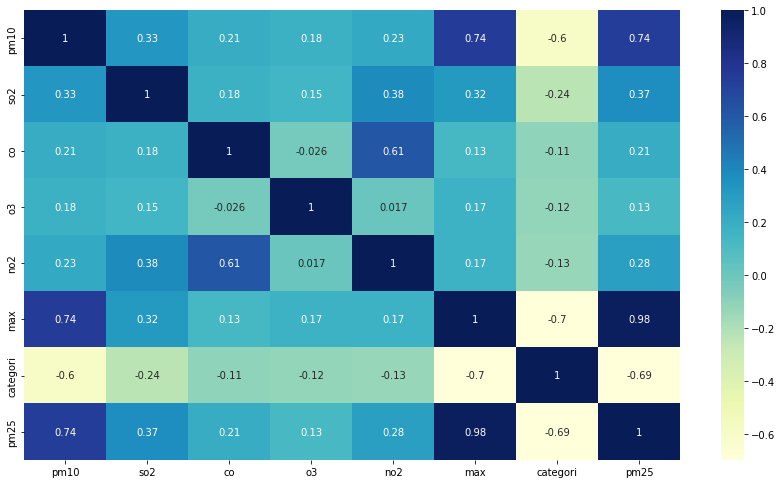

In [ ]:
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

# Data Preparation

In [ ]:
new_df = dataframe.copy()

In [ ]:
new_df = new_df.drop(['tanggal','location'], axis=1)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      365 non-null    int64  
 1   so2       365 non-null    int64  
 2   co        365 non-null    int64  
 3   o3        365 non-null    int64  
 4   no2       365 non-null    int64  
 5   max       365 non-null    int64  
 6   critical  365 non-null    object 
 7   categori  365 non-null    object 
 8   pm25      334 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 25.8+ KB


## Data Clearing

### Mengatasi Missing Value
Menghitung jumlah baris yang nilai pada kolom bernilai null atau nan. Perhitungan dilakukan dengan menjumlahkan baris yang bernilai null atau nan pada kolom tersebut dengan fungsi **sum()**.

In [ ]:
new_df.isnull().sum()

pm10         0
so2          0
co           0
o3           0
no2          0
max          0
critical     0
categori     0
pm25        31
dtype: int64

### Imputasi mean

In [ ]:
data_pm25 = pd.DataFrame(new_df['pm25'])
data_pm25 = data_pm25.fillna(data_pm25.mean())

new_df = new_df.drop(['pm25'],axis=1)

new_df["pm25"] = data_pm25

In [ ]:
new_df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
pm25        0
dtype: int64

## Handling Outlier

### Visualisasi Outliner

Menggunakan fungsi **boxplot()**, dilakukan visualisasi dengan diagram box plot untuk melihat setiap pencilan pada kolom(fitur) datasets.

In [ ]:
columns = new_df.columns
numerical_features = columns.drop(['categori','critical']) 

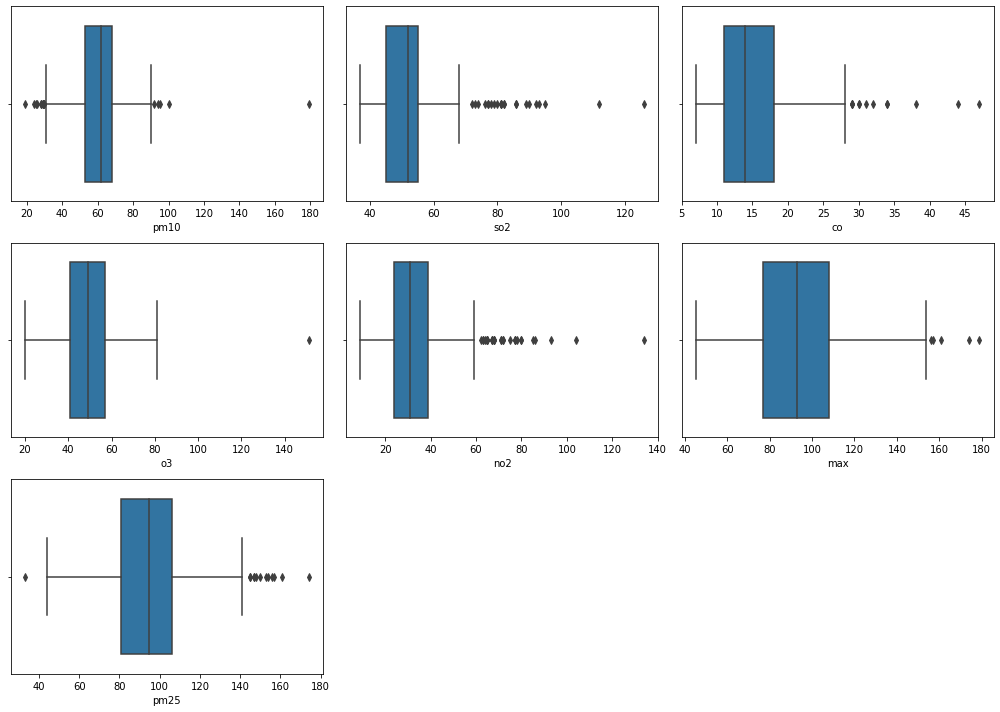

In [ ]:
RP=plt.figure(figsize=(14,10))
for i, feature in enumerate(numerical_features):
  r=RP.add_subplot(3,3,i+1)
  sns.boxplot(x=new_df[feature])
RP.tight_layout()

### Metode winsorize
Dari hasil visualisasi dengan box plot terlihat bahwa pada setiap kolom terdapat pencilan.

In [ ]:
from scipy.stats.mstats import winsorize
data = new_df

In [ ]:
for feature in numerical_features:
  wins = winsorize(data[feature],limits=[0.1,0.2])
  data[feature] = wins

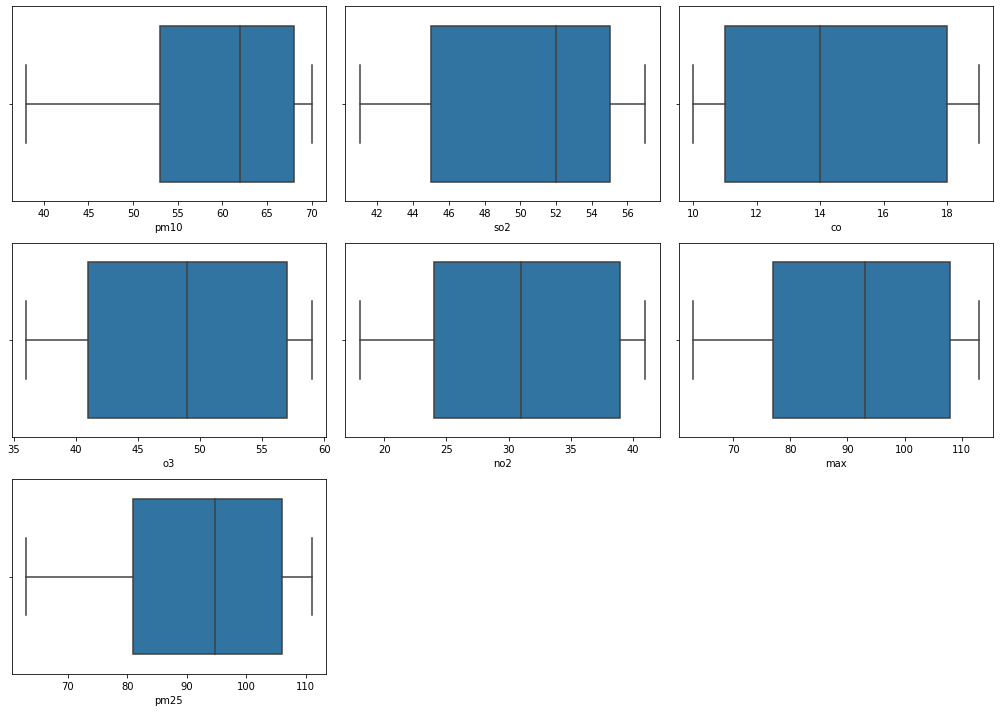

In [ ]:
RP=plt.figure(figsize=(14,10))
for i, feature in enumerate(numerical_features):
  r=RP.add_subplot(3,3,i+1)
  sns.boxplot(x=data[feature])
RP.tight_layout()

In [ ]:
new_df = data

## One Hot Encoding

In [ ]:
new_df['critical'].unique()

array(['O3', 'PM25', 'PM10', 'PM26', 'SO2'], dtype=object)

In [ ]:
new_df = pd.concat([new_df, pd.get_dummies(new_df['critical'], prefix='critical')],axis=1)
new_df.drop(['critical'], axis=1, inplace=True)
new_df.head()

,pm10,so2,co,o3,no2,max,categori,pm25,critical_O3,critical_PM10,critical_PM25,critical_PM26,critical_SO2
0,43,57,19,36,41,65,SEDANG,94.694611,1,0,0,0,0
1,58,57,19,59,41,86,SEDANG,94.694611,0,0,1,0,0
2,64,57,19,59,41,93,SEDANG,94.694611,0,0,1,0,0
3,50,57,19,36,41,77,SEDANG,94.694611,1,0,0,0,0
4,59,57,19,36,41,89,SEDANG,94.694611,0,0,1,0,0


## Standarisasi 
Melakukan standarisasi dengan **StandardScaler**.  proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1

In [ ]:
from sklearn.preprocessing import StandardScaler

features = new_df.columns.drop(['categori'])

scaler = StandardScaler()
scaler.fit(new_df[features])
new_df[features] = scaler.transform(new_df.loc[:, features])
new_df[features].head()

,pm10,so2,co,o3,no2,max,pm25,critical_O3,critical_PM10,critical_PM25,critical_PM26,critical_SO2
0,-1.565349,1.174527,1.330628,-1.522736,1.264444,-1.511717,0.166633,3.687818,-0.074227,-3.403852,-0.052414,-0.052414
1,-0.107570,1.174527,1.330628,1.253240,1.264444,-0.305208,0.166633,-0.271163,-0.074227,0.293785,-0.052414,-0.052414
2,0.475542,1.174527,1.330628,1.253240,1.264444,0.096961,0.166633,-0.271163,-0.074227,0.293785,-0.052414,-0.052414
3,-0.885052,1.174527,1.330628,-1.522736,1.264444,-0.822284,0.166633,3.687818,-0.074227,-3.403852,-0.052414,-0.052414
4,-0.010384,1.174527,1.330628,-1.522736,1.264444,-0.132850,0.166633,-0.271163,-0.074227,0.293785,-0.052414,-0.052414


## Train-Test-Split
Membagi dataset menjadi data train dan test dengan fungsi **train_test_split**. Ukuran yang digunakan adalah 20% untuk data test dan 80% untuk data uji.


In [ ]:
from sklearn.model_selection import train_test_split
 

X = new_df.drop(["categori"],axis =1)
y = new_df["categori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 365
Total # of sample in train dataset: 292
Total # of sample in test dataset: 73


## Handling Imbalanced Dataset
Melakukan resample pada data training untuk mengatasi imbalance dataset

In [ ]:
data = pd.concat([X_train,y_train], axis=1)

In [ ]:
data.head(2)

,pm10,so2,co,o3,no2,max,pm25,critical_O3,critical_PM10,critical_PM25,critical_PM26,critical_SO2,categori
162,0.767098,0.640429,0.746177,1.011851,0.518248,0.096961,0.060922,-0.271163,-0.074227,0.293785,-0.052414,-0.052414,SEDANG
252,-0.107570,0.462397,-1.299404,-1.160652,0.145150,-0.649925,-0.750026,-0.271163,-0.074227,0.293785,-0.052414,-0.052414,SEDANG


In [ ]:
import pandas as pd
from sklearn.utils import resample,shuffle

df_1 = data[data['categori'] == 'BAIK']

other_df = data[data['categori'] != 'BAIK']  

df_1_upsampled = resample(df_1,random_state=42,n_samples=100,replace=True)

df_upsampled = pd.concat([df_1_upsampled,other_df])
# df_upsampled

In [ ]:
df_upsampled['categori'].value_counts()

SEDANG         184
TIDAK SEHAT    107
BAIK           100
Name: categori, dtype: int64

In [ ]:
df_upsampled.head(3)

,pm10,so2,co,o3,no2,max,pm25,critical_O3,critical_PM10,critical_PM25,critical_PM26,critical_SO2,categori
294,-2.051276,-1.495961,-1.299404,-0.919263,-1.595973,-1.626623,-1.810497,-0.271163,-0.074227,0.293785,-0.052414,-0.052414,BAIK
294,-2.051276,-1.495961,-1.299404,-0.919263,-1.595973,-1.626623,-1.810497,-0.271163,-0.074227,0.293785,-0.052414,-0.052414,BAIK
294,-2.051276,-1.495961,-1.299404,-0.919263,-1.595973,-1.626623,-1.810497,-0.271163,-0.074227,0.293785,-0.052414,-0.052414,BAIK


In [ ]:
X_train = df_upsampled.drop(['categori'],axis=1)
y_train = df_upsampled['categori']

In [ ]:
y_train.value_counts()

SEDANG         184
TIDAK SEHAT    107
BAIK           100
Name: categori, dtype: int64

# Modeling

##KNeighborsClassifier

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print(score)

0.9178082191780822


In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.9052304840326354

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

ab = AdaBoostClassifier(
  n_estimators= 10,
  learning_rate= 1
)

ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print(score)

0.9726027397260274


In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.9592465753424658